In [1]:
from IPython.display import display, Image, HTML
import matplotlib.pyplot as plt
import os
import numpy as np
import random as random
from scipy import ndimage
from six.moves import cPickle as pickle
import hashlib
import itertools
from sklearn.linear_model import LogisticRegression
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

/Users/lkuligin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/lkuligin/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Problem 1

Let's make sure that the data look sensible. For each letter we will have a look at some random pictures from the data 

In [12]:
explore_sample("notMNIST_large", 10)

notMNIST_large/A


notMNIST_large/B


notMNIST_large/C


notMNIST_large/D


notMNIST_large/E


notMNIST_large/F


notMNIST_large/G


notMNIST_large/H


notMNIST_large/I


notMNIST_large/J


In [13]:
explore_sample("notMNIST_small", 10)

notMNIST_small/A


notMNIST_small/B


notMNIST_small/C


notMNIST_small/D


notMNIST_small/E


notMNIST_small/F


notMNIST_small/G


notMNIST_small/H


notMNIST_small/I


notMNIST_small/J


In [276]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
train_folders = ['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 
                 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 
                 'notMNIST_large/I', 'notMNIST_large/J']
test_folders = ['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 
                'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 
                'notMNIST_small/I', 'notMNIST_small/J']
train_datasets = maybe_pickle(train_folders, 45000)

notMNIST_large/A.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/A.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_large/B.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/B.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_large/C.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/C.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_large/D.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/D.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_large/E.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/E.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_large/F.pickle already present - Skipping pickling.
('Unable to save data to', 'notMNIST_large/F.pickle', ':', TypeError("'dict' object is not callable",))
notMNIST_l

In [39]:
test_datasets = maybe_pickle(test_folders, 1800)

Pickling notMNIST_small/A.pickle.
notMNIST_small/A
('Could not read:', 'notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png', ':', IOError("cannot identify image file 'notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.13262637)
('Standard deviation:', 0.44512793)
Pickling notMNIST_small/B.pickle.
notMNIST_small/B
('Full dataset tensor:', (1873, 28, 28))
('Mean:', 0.005356085)
('Standard deviation:', 0.45711532)
Pickling notMNIST_small/C.pickle.
notMNIST_small/C
('Full dataset tensor:', (1873, 28, 28))
('Mean:', -0.1415206)
('Standard deviation:', 0.44269031)
Pickling notMNIST_small/D.pickle.
notMNIST_small/D
('Full dataset tensor:', (1873, 28, 28))
('Mean:', -0.049216662)
('Standard deviation:', 0.45975891)
Pickling notMNIST_small/E.pickle.
notMNIST_small/E
('Full dataset tensor:', (1873, 28, 28))
('Mean:', -0.05991479)
('Standard deviation:', 0.45734963)
Pickling notMNIST_s

In [41]:
print train_datasets
print test_datasets

['notMNIST_large/A.pickle', 'notMNIST_large/B.pickle', 'notMNIST_large/C.pickle', 'notMNIST_large/D.pickle', 'notMNIST_large/E.pickle', 'notMNIST_large/F.pickle', 'notMNIST_large/G.pickle', 'notMNIST_large/H.pickle', 'notMNIST_large/I.pickle', 'notMNIST_large/J.pickle']
['notMNIST_small/A.pickle', 'notMNIST_small/B.pickle', 'notMNIST_small/C.pickle', 'notMNIST_small/D.pickle', 'notMNIST_small/E.pickle', 'notMNIST_small/F.pickle', 'notMNIST_small/G.pickle', 'notMNIST_small/H.pickle', 'notMNIST_small/I.pickle', 'notMNIST_small/J.pickle']


# Problem 2

In [119]:
def display_sample(dirs, plots, sample_size):
    img_per_ax = 8
    rows_per_plot = int(ceil(1.*sample_size/img_per_ax))
    sample_size = rows_per_plot * img_per_ax
    f, axarr = plt.subplots(plots*rows_per_plot, img_per_ax)
    for i, path in enumerate(np.random.choice(dirs, plots)):
        data = get_data(path)
        images = data.shape[0]
        idx = np.random.randint(0, images-1, sample_size)
        images_sample = data[idx, :]
        title = get_class_name(path)
        for j, img in enumerate(images_sample):
            ax_ = axarr[(i*rows_per_plot+j/8), j%8]
            ax_.set_title(' '.join((title, str(j+1))))
            ax_.axis('off')
            ax_.imshow(img)

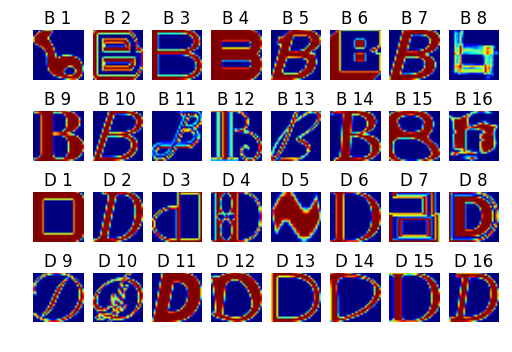

In [117]:
display_sample(train_datasets, 2, 16)

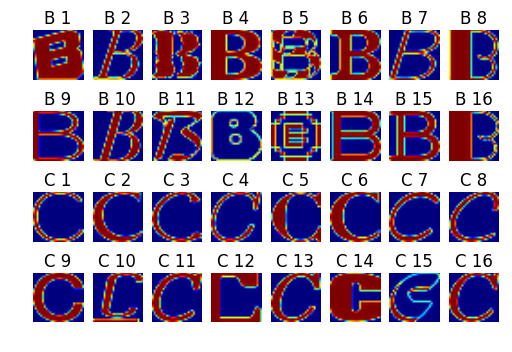

In [118]:
display_sample(test_datasets, 2, 16)

# Problem 3

Let's check that data are balanced across the classes

In [139]:
check_class_balance(train_datasets)
check_class_balance(test_datasets)

Entries per class: min = 52909, max = 52912, avg = 52911.4
Entries per class: min = 1872, max = 1873, avg = 1872.4


In [275]:
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

('Unable to process data from', 'notMNIST_large/A.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/B.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/C.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/D.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/E.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/F.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/G.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/H.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process data from', 'notMNIST_large/I.pickle', ':', TypeError("'dict' object is not callable",))
('Unable to process

In [147]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

# Problem 4

Convince yourself that the data is still good after shuffling!

In [20]:
LABELS_DECODING = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 
                   7: 'H', 8: 'I', 9: 'G'}

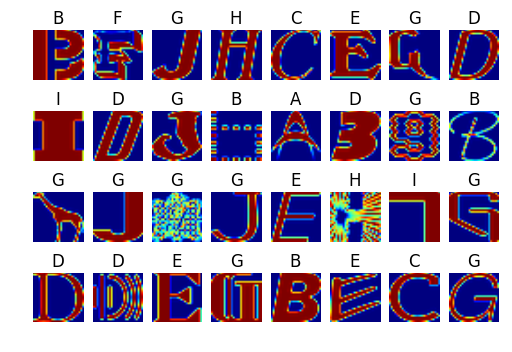

In [184]:
display_dataset(train_dataset, train_labels, 32)

In [181]:
def display_dataset(dataset, dataset_labels, sample_size):
    img_per_ax = 8
    rows_per_plot = int(ceil(1.*sample_size/img_per_ax))
    sample_size = rows_per_plot * img_per_ax
    f, axarr = plt.subplots(rows_per_plot, img_per_ax)
    images = dataset.shape[0]
    idx = np.random.randint(0, images-1, sample_size)
    images_sample = dataset[idx, :]
    labels_sample = dataset_labels[idx]
    for i, (img, label) in enumerate(zip(images_sample, labels_sample)):
        label_ = LABELS_DECODING.get(label)
        ax_ = axarr[i/img_per_ax, i%img_per_ax]
        ax_.set_title(label_)
        ax_.axis('off')
        ax_.imshow(img)

In [149]:
pickle_file = 'notMNIST.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)

In [151]:
statinfo = os.stat(pickle_file)
print 'Compressed pickle size:', statinfo.st_size

Compressed pickle size: 690800441


# Problem 5

In [50]:
%time hashed_train_dataset = index_images(train_dataset, hash)
%time tp_train = calculate_selfoccurences(hashed_train_dataset, train_dataset)

CPU times: user 14.7 s, sys: 216 ms, total: 14.9 s
Wall time: 15.6 s
CPU times: user 295 ms, sys: 9.73 ms, total: 304 ms
Wall time: 383 ms


In [ ]:
def calculate_occurences(hashed_dataset_left, dataset_left, hashed_dataset_right, dataset_right):
    for key, value in hashed_dataset_left.iteritems():
        

In [55]:
print """Initial amount of images: {0} train
Possible duplicates after hashing: {1} clusters with {2} elements in it, mean: {3:.2f}, median: {4:.2f}, max: {5}
Real duplicates: {6} clusters with {7} elements, mean: {8:.2f}, median: {9:.2f}, max: {10}
""".format(train_dataset.shape[0], 
           len([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]), 
           sum([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]), 
           np.mean([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           np.median([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           max([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           len(tp_train),
           sum([len(el) for el in tp_train if len(el) > 1]),
           np.mean([len(el) for el in tp_train if len(el) > 1]),
           np.median([len(el) for el in tp_train if len(el) > 1]),
           max([len(el) for el in tp_train if len(el) > 1])
          )

Initial amount of images: 200000 train
Possible duplicates after hashing: 8952 clusters with 21565 elements in it, mean: 2.41, median: 2.00, max: 2100
Real duplicates: 8952 clusters with 21565 elements, mean: 2.41, median: 2.00, max: 2100



In [58]:
%time hashed_train_dataset = index_images(train_dataset, lambda x: hashlib.md5(x).digest())
%time tp_train = calculate_selfoccurences(hashed_train_dataset, train_dataset)

CPU times: user 14.7 s, sys: 125 ms, total: 14.9 s
Wall time: 15.2 s
CPU times: user 338 ms, sys: 5.72 ms, total: 344 ms
Wall time: 347 ms


In [77]:
%time hashed_test_dataset = index_images(test_dataset, lambda x: hashlib.md5(x).digest())
%time hashed_valid_dataset = index_images(valid_dataset, lambda x: hashlib.md5(x).digest())

CPU times: user 752 ms, sys: 6.11 ms, total: 758 ms
Wall time: 772 ms
CPU times: user 721 ms, sys: 49.1 ms, total: 770 ms
Wall time: 774 ms


In [65]:
print """Initial amount of images: {0} train
Possible duplicates after hashing (md5): {1} clusters with {2} elements in it, mean: {3:.2f}, median: {4:.2f}, max: {5}
Real duplicates: {6} clusters with {7} elements, mean: {8:.2f}, median: {9:.2f}, max: {10}
""".format(train_dataset.shape[0], 
           len([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]), 
           sum([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]), 
           np.mean([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           np.median([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           max([len(el) for _, el in hashed_train_dataset.iteritems() if len(el) > 1]),
           len(tp_train),
           sum([len(el) for el in tp_train if len(el) > 1]),
           np.mean([len(el) for el in tp_train if len(el) > 1]),
           np.median([len(el) for el in tp_train if len(el) > 1]),
           max([len(el) for el in tp_train if len(el) > 1])
          )

Initial amount of images: 200000 train
Possible duplicates after hashing (md5): 8952 clusters with 21565 elements in it, mean: 2.41, median: 2.00, max: 2100
Real duplicates: 8952 clusters with 21565 elements, mean: 2.41, median: 2.00, max: 2100



In [81]:
def display_dataset_indx(dataset, dataset_labels, indices):
    img_per_ax = 8
    f, axarr = plt.subplots((len(indices)+1)/8, img_per_ax)
    for i, (img, label) in enumerate(zip(dataset[indices, :], dataset_labels[indices])):
        label_ = LABELS_DECODING.get(label)
        ax_ = axarr[i/img_per_ax, i%img_per_ax]
        ax_.set_title(label_)
        ax_.axis('off')
        ax_.imshow(img)

Let's visually check that we really have duplicates

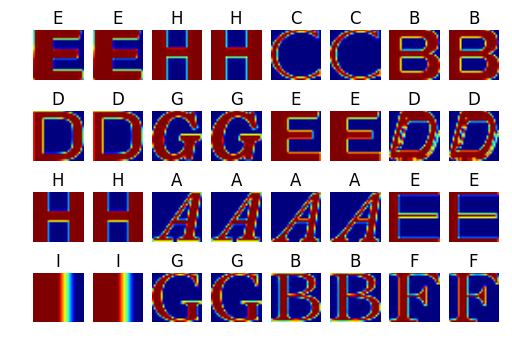

In [103]:
import random as random
indices_to_display = []
tmp = random.sample(range(len(tp_train)), 16)
for ind in tmp:
    ind1 = random.sample(tp_train[ind], 2)
    indices_to_display.append(ind1[0])
    indices_to_display.append(ind1[1])
display_dataset_indx(train_dataset, train_labels, indices_to_display)

In [114]:
#so all duplicaetea are "real"! Let's eliminate them:
train_idx_without_duplicates = np.array([el[0] for _, el in hashed_train_dataset.iteritems()])
test_idx_without_duplicates = np.array([el[0] for _, el in hashed_test_dataset.iteritems()])
valid_idx_without_duplicates = np.array([el[0] for _, el in hashed_valid_dataset.iteritems()])

In [152]:
train_dataset_without_duplicates = train_dataset[train_idx_without_duplicates, :]
train_labels_without_duplicates = train_labels[train_idx_without_duplicates]
test_dataset_without_duplicates = test_dataset[test_idx_without_duplicates, :]
test_labels_without_duplicates = test_labels[test_idx_without_duplicates]
valid_dataset_without_duplicates = valid_dataset[valid_idx_without_duplicates, :]
valid_labels_without_duplicates = valid_labels[valid_idx_without_duplicates]

In [155]:
%time hashed_train_dataset1 = index_images(train_dataset_without_duplicates, lambda x: hashlib.md5(x).digest())
%time hashed_test_dataset1 = index_images(test_dataset_without_duplicates, lambda x: hashlib.md5(x).digest())
%time hashed_valid_dataset1 = index_images(valid_dataset_without_duplicates, lambda x: hashlib.md5(x).digest())

CPU times: user 14 s, sys: 132 ms, total: 14.2 s
Wall time: 14.6 s
CPU times: user 726 ms, sys: 4.81 ms, total: 731 ms
Wall time: 741 ms
CPU times: user 728 ms, sys: 4.07 ms, total: 732 ms
Wall time: 737 ms


In [172]:
duplicates_train1, duplicates_test1 = calculate_occurences(hashed_train_dataset1, hashed_test_dataset1)
duplicates_train2, duplicates_valid1 = calculate_occurences(hashed_train_dataset1, hashed_valid_dataset1)
duplicates_valid2, duplicates_test2 = calculate_occurences(hashed_valid_dataset1, hashed_test_dataset1)

Eliminates images that are both in at least two datasets (test, train or valid)

In [180]:
train_indices_duplicates = set(arange(train_dataset_without_duplicates.shape[0])).difference(duplicates_train1.union(duplicates_train2))
test_indices_duplicates = set(arange(test_dataset_without_duplicates.shape[0])).difference(duplicates_test1.union(duplicates_test2))
valid_indices_duplicates = set(arange(valid_dataset_without_duplicates.shape[0])).difference(duplicates_valid1.union(duplicates_valid2))

In [186]:
cleaned_train_dataset = train_dataset_without_duplicates[np.array(list(train_indices_duplicates)), :]
cleaned_train_labels = train_labels_without_duplicates[np.array(list(train_indices_duplicates))]
cleaned_test_dataset = test_dataset_without_duplicates[np.array(list(test_indices_duplicates)), :]
cleaned_test_labels = test_labels_without_duplicates[np.array(list(test_indices_duplicates))]
cleaned_valid_dataset = valid_dataset_without_duplicates[np.array(list(valid_indices_duplicates)), :]
cleaned_valid_labels = valid_labels_without_duplicates[np.array(list(valid_indices_duplicates))]

In [191]:
print """After duplicates elimination: 
\t Train dataset: {0} out of {1}
\t Test dataset: {2} out of {3}
\t Validation dataset: {4} out of {5}""".format(cleaned_train_dataset.shape[0], train_dataset.shape[0],
                                               cleaned_test_dataset.shape[0], cleaned_test_labels.shape[0],
                                               cleaned_valid_dataset.shape[0], cleaned_valid_labels.shape[0])

After duplicates elimination: 
	 Train dataset: 185307 out of 200000
	 Test dataset: 8609 out of 8609
	 Validation dataset: 8856 out of 8856


In [2]:
pickle_file = 'notMNIST_clean.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': cleaned_train_dataset,
        'train_labels': cleaned_train_labels,
        'valid_dataset': cleaned_valid_dataset,
        'valid_labels': cleaned_valid_labels,
        'test_dataset': cleaned_test_dataset,
        'test_labels': cleaned_test_labels
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)

('Unable to save data to', 'notMNIST_clean.pickle', ':', NameError("name 'cleaned_train_dataset' is not defined",))


In [193]:
statinfo = os.stat(pickle_file)
print 'Compressed pickle size:', statinfo.st_size

Compressed pickle size: 636704521


# Problem 6

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.
Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.
Optional question: train an off-the-shelf model on all the data!

In [4]:
#pickle_file = 'notMNIST.pickle'
pickle_file = 'notMNIST_clean.pickle'
data = {}
try:
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
        train_dataset = data['train_dataset']
        train_labels = data['train_labels']
        valid_dataset = data['valid_dataset']
        valid_labels = data['valid_labels']
        test_dataset = data['test_dataset']
        test_labels = data['test_labels']
except Exception as e:
    print('Unable to load data from', pickle_file, ':', e)

In [5]:
X_test = test_dataset.reshape(test_dataset.shape[0], 28 * 28)
Y_test = test_labels

In [ ]:
models_basic = {}
for sample_size in (50, 100, 1000, 5000):
    idx = np.random.randint(0, train_dataset.shape[0], sample_size)
    %time model_ = train_model(train_dataset[idx, :], train_labels[idx])
    models_basic[sample_size] = model_

CPU times: user 72.9 ms, sys: 60.1 ms, total: 133 ms
Wall time: 1.35 s
CPU times: user 149 ms, sys: 57.9 ms, total: 207 ms
Wall time: 902 ms


In [9]:
print "Result for the basic logistic regression"
for sample_size, model_ in models_basic.iteritems():
    print """\tSample size: {0}, score on the test set: {1:.2f}""".format(sample_size, model_.score(X_test, Y_test))

Result for the basic logistic regression
	Sample size: 1000, score on the test set: 0.82
	Sample size: 5000, score on the test set: 0.84
	Sample size: 50, score on the test set: 0.61
	Sample size: 100, score on the test set: 0.70
	Sample size: 20000, score on the test set: 0.86


In [8]:
sample_size = 5000
idx = np.random.randint(0, train_dataset.shape[0], sample_size)
X_train = train_dataset[idx, :].reshape(sample_size, 28*28)
lr = LogisticRegression(C=0.2, solver='lbfgs')
%time model= lr.fit(X_train, train_labels[idx])

CPU times: user 10.4 s, sys: 119 ms, total: 10.5 s
Wall time: 5.58 s


In [10]:
print """\tSample size: {0}, score on the test set: {1:.2f}""".format(sample_size, lr.score(X_test, Y_test))

	Sample size: 5000, score on the test set: 0.86


In [16]:
Y_predict = lr.predict(X_test)

In [43]:
true_predictions = [(img, label, label_predicted) for img, label, label_predicted in zip(X_test, Y_test, Y_predict) 
                                                                        if label == label_predicted]
false_predictions = [(img, label, label_predicted) for img, label, label_predicted in zip(X_test, Y_test, Y_predict) 
                                                                        if label <> label_predicted]

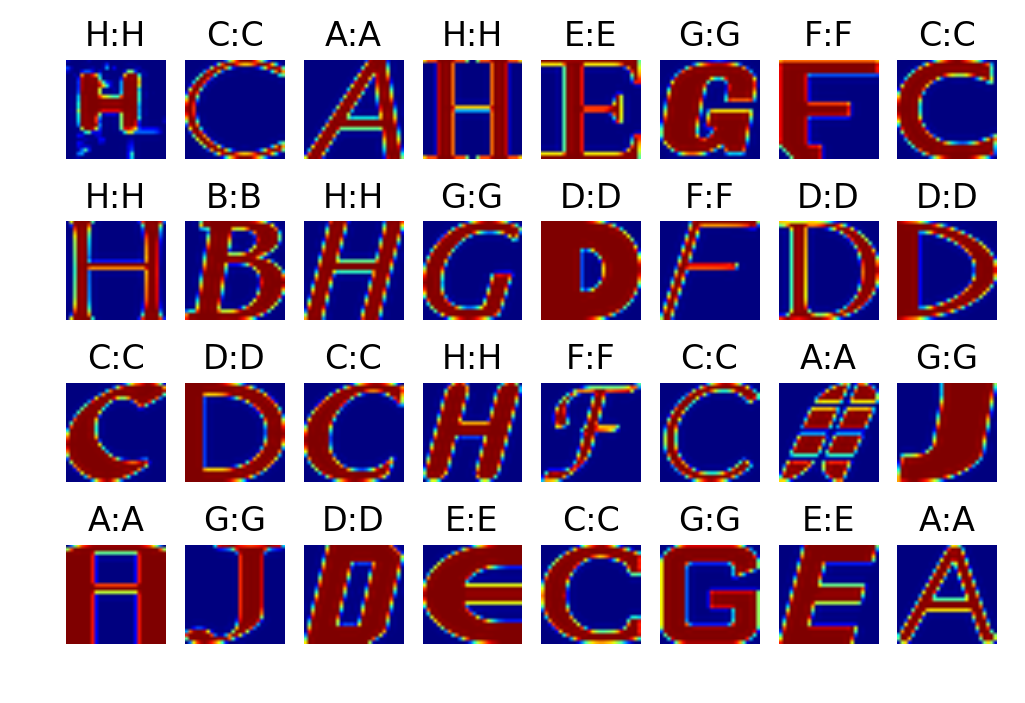

In [52]:
import random as random
display_dataset_indx_prediction(random.sample(true_predictions, 32))

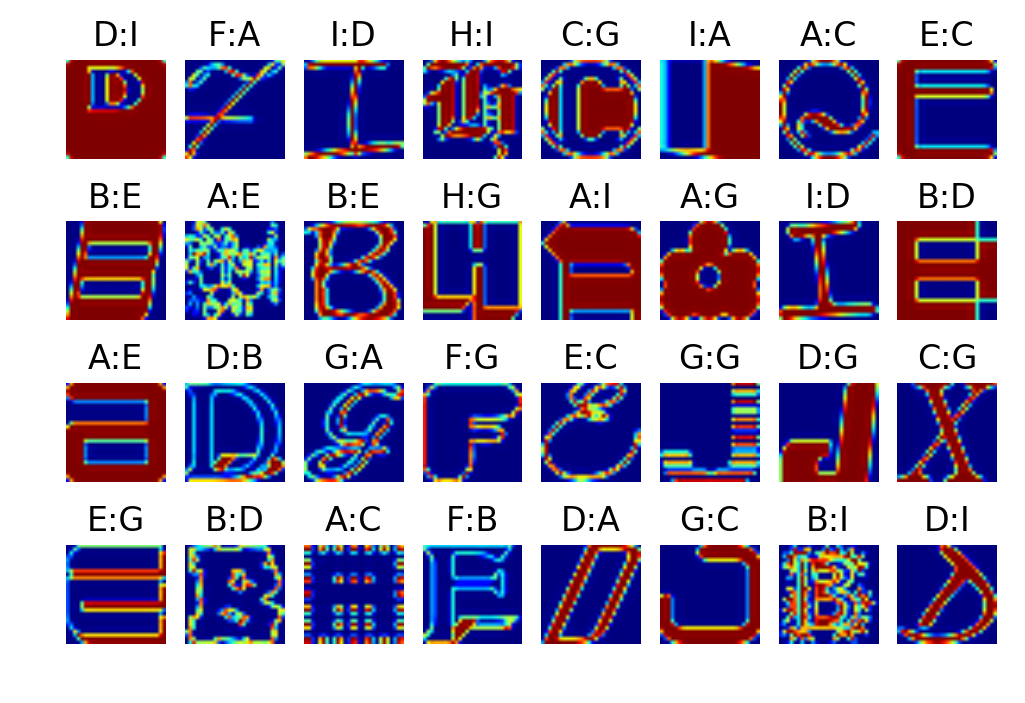

In [53]:
import random as random
display_dataset_indx_prediction(random.sample(false_predictions, 32))

In [51]:
def display_dataset_indx_prediction(data):
    img_per_ax = 8
    f, axarr = plt.subplots((len(data)+1)/8, img_per_ax)
    for i, (img, label, predicted_label) in enumerate(data):
        label_ = LABELS_DECODING.get(label)
        predicted_label_ = LABELS_DECODING.get(predicted_label)
        ax_ = axarr[i/img_per_ax, i%img_per_ax]
        ax_.set_title("{0}:{1}".format(label_, predicted_label_))
        ax_.axis('off')
        ax_.imshow(img.reshape(28, 28))

# Utils

In [10]:
def explore_sample(folder, sample_size):
    dirs = os.listdir(folder)
    for dir_ in dirs:
        if dir_ <> ".DS_Store":
            path = os.path.join(folder, dir_)
            print path
            files_list = np.random.choice(np.array(os.listdir(path)), sample_size)
            display(HTML(''.join(make_html(path, x) for x in files_list)))
            #for file_ in np.random.choice(files_list, sample_size):
             #   display(Image(filename=os.path.join(folder, dir_, file_)))

def make_html(folder, image):
     return '<img src="{}" style="display:inline;margin:1px"/>'.format(os.path.join(folder, image))

In [16]:
def load_letter(folder, min_num_images):
    """Load the data for a single letter label"""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - 
                          pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
        try:
            with open(set_filename, 'wb') as f:
                pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to', set_filename, ':', e)
    return dataset_names

In [124]:
def get_class_name(path):
    return path.split('/')[-1].split('.')[0]

In [130]:
def get_data(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [138]:
def check_class_balance(dirs):
    res = {}
    vals = []
    total = 0
    for i, path in enumerate(dirs):
        data = get_data(path)
        title = get_class_name(path)
        res[title] = data.shape[0]
        vals.append(data.shape[0])
        total += data.shape[0]
    print "Entries per class: min = {0}, max = {1}, avg = {2}".format(min(vals), max(vals), np.mean(vals))

In [144]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size / num_classes
    tsize_per_class = train_size / num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class
                    
                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
    return valid_dataset, valid_labels, train_dataset, train_labels

In [146]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

In [ ]:
def investigate_dataset(dataset):
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.title(pretty_labels[labels[item]])
        plt.imshow(dataset[item])

In [264]:
pickle_file = 'udacityDL/NotMNIST/notMNIST.pickle'

try:
    f = open(pickle_file, 'rb')
    open = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels
    }
    pickle.load(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)

('Unable to save data to', 'udacityDL/NotMNIST/notMNIST.pickle', ':', TypeError("'dict' object is not callable",))


In [79]:
def calculate_selfoccurences(hashed_dataset, dataset):
    true_positives = []
    for hash_, indices in hashed_dataset.iteritems():
        if len(indices) > 1:
            images = dataset[indices, :]
            clusters = []
            clusters_ind = []
            for ind, img in zip(indices, images):
                for i, cluster_img in enumerate(clusters):
                    if np.array_equal(cluster_img, dataset[ind,:]):
                        clusters_ind[i].append(ind)
                        break
                else:
                    clusters.append(img)
                    clusters_ind.append([ind])
            true_positives += clusters_ind
    return true_positives

In [136]:
def calculate_occurences(hashed_dataset_left, hashed_dataset_right):
    duplicates_left = set()
    duplicates_right = set()
    for hash_left, indx_left in hashed_dataset_left.iteritems():
        if hash_left in hashed_dataset_right:
            duplicates_left.add(indx_left[0])
            duplicates_right.add(hashed_dataset_right[hash_left][0])
    return duplicates_left, duplicates_right

In [112]:
def index_images(dataset, hash_func):
    res = {}
    for i, img in enumerate(dataset):
        arr = np.hstack(img)
        h = hash_func(arr.tostring())
        if h not in res:
            res[h] = []
        res[h].append(i)
    return res

In [145]:
def clean_dataset(initial_dataset, good_indices, bad_indices = None, initial_labels = None):
    tmp_dataset = initial_dataset[good_indices, :]
    print type(tmp_dataset)
    tmp_labels = None
    print tmp_dataset.shape[0]
    res_indices =  np.setxor1d(np.indices(tmp_dataset.shape[0]), bad_indices)
    if intial_labels:
        tmp_labels = initial_labels[good_indices]
        res_labels = tmp_labels[res_indices]
    return tmp_dataset[res_indices, :], res_labels

In [10]:
pickle_file = 'models_basic.pickle'
try:
    f = open(pickle_file, 'wb')
    pickle.dump(models_basic, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)

In [ ]:
def train_model(train_dataset, train_labels, C = 1.0, penalty = 'l2'):
    lr_model = LogisticRegression()
    X_train = train_dataset.reshape(train_dataset.shape[0], 28*28)
    lr_model.fit(X_train, train_labels)
    return lr_model